In [434]:
!pip install plotly

In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objs as go

In [436]:
data = pd.read_csv('zara.csv')
data.head()

,product_id,product_position,promotion,seasonal,sales_volume,sku,name,price,product_category,section,gross_margin,scraped_at
0,143231,Aisle,No,No,2578,311297745-800-2,Technical padded jacket,899,Jackets,MAN,34872,2023-01-03 00:00:00
1,165786,End-cap,No,Yes,1278,315075917-803-2,Contrast interior sweater,599,Sweaters,MAN,468701,2023-01-03 00:00:00
2,125938,Aisle,Yes,Yes,1204,313890680-450-2,Oversized knit sweater,499,Sweaters,WOMAN,414452,2023-01-04 00:00:00
3,168837,Aisle,No,No,665,311292194-731-2,Faux suede jacket,899,Jackets,MAN,135188,2023-01-05 00:00:00
4,158781,End-cap,Yes,Yes,2443,318209963-800-2,Faux suede overshirt,699,Jackets,MAN,286124,2023-01-05 00:00:00


<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;">Business problems that can be solved using this dataset:</p>




    1. Sales Performance Analysis: Which products are excelling in sales, and which are underperforming
    2. Profit Margin Analysis: Does the profit margin significantly impact sales?
    3. Efficiency of Sales Methods: Which sales product position is more effective Front of Store, Aisle or End - Cap?
    4. Price Optimization: Is there a specific price range that achieves better sales than others?
    5. Product Portfolio Optimization I: Determine which products are most profitable, segmented by Product Position.
    6. Predictive Sales Analysis: Develop a forecast for monthly sales.

<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;">Performing Exploratory Data Analysis (EDA)</p>

In [440]:
# Show dataframe shape
data.shape

(252, 12)

#Duplicate Rows
data.duplicated().sum()

#Info of the dataset
data.info()

In [443]:
# Show the null values
data.isnull().sum()

product_id          0
product_position    0
promotion           0
seasonal            0
sales_volume        0
sku                 0
name                1
price               0
product_category    0
section             0
gross_margin        0
scraped_at          0
dtype: int64

In [444]:
# Overview of the data head
data.head()

,product_id,product_position,promotion,seasonal,sales_volume,sku,name,price,product_category,section,gross_margin,scraped_at
0,143231,Aisle,No,No,2578,311297745-800-2,Technical padded jacket,899,Jackets,MAN,34872,2023-01-03 00:00:00
1,165786,End-cap,No,Yes,1278,315075917-803-2,Contrast interior sweater,599,Sweaters,MAN,468701,2023-01-03 00:00:00
2,125938,Aisle,Yes,Yes,1204,313890680-450-2,Oversized knit sweater,499,Sweaters,WOMAN,414452,2023-01-04 00:00:00
3,168837,Aisle,No,No,665,311292194-731-2,Faux suede jacket,899,Jackets,MAN,135188,2023-01-05 00:00:00
4,158781,End-cap,Yes,Yes,2443,318209963-800-2,Faux suede overshirt,699,Jackets,MAN,286124,2023-01-05 00:00:00


In [445]:
# Overview of the data tail
data.tail()

,product_id,product_position,promotion,seasonal,sales_volume,sku,name,price,product_category,section,gross_margin,scraped_at
247,115873,End-cap,Yes,Yes,2606,311297400-803-1,Contrast topstitching crop knit sweater,599,Sweaters,WOMAN,229854,2024-02-21 00:00:00
248,140142,Front of Store,Yes,No,606,328207551-500-2,Knit open back pearly sweater,499,Sweaters,WOMAN,823432,2024-02-22 00:00:00
249,137044,Aisle,No,Yes,2534,320680326-107-39,Patch bomber jacket,1299,Jackets,MAN,512628,2024-02-22 00:00:00
250,133183,Front of Store,Yes,Yes,2859,318265017-401-2,Cotton blend bomber jacket,899,Jackets,MAN,314446,2024-02-23 00:00:00
251,158958,End-cap,No,No,903,320111404-428-2,Ribbed knit t-shirt,459,T-shirts,MAN,508306,2024-02-28 00:00:00


In [446]:
# # Remove non-numeric characters from the columns
data['sales_volume'] = data['sales_volume'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data['price'] = data['price'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)

<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;">Sales Performance Analysis: Which products are excelling in sales, and which are underperforming?</p>

In [448]:
# First lets find out the total revenue
total_revenue = data['sales_volume'].sum()
total_revenue

459573.0

In [449]:
# Aggregating total sales and units sold for each product
product_sales = data.groupby('product_category').agg({'sales_volume': 'sum'}).reset_index()

# Sorting products by total sales in descending order to identify top-performing products
top_performing_products = product_sales.sort_values(by='sales_volume', ascending=False).head()

# Displaying the results
print("Top-Performing Products:")
top_performing_products

Top-Performing Products:


,product_category,sales_volume
0,Jackets,259468.0
3,Sweaters,75242.0
2,Shoes,57906.0
4,T-shirts,53637.0
1,Jeans,13320.0


In [450]:
# Sorting products by total sales in ascending order to identify underperforming products
underperforming_products = product_sales.sort_values(by='sales_volume', ascending=True).head()

print("\nUnderperforming Products:")
underperforming_products


Underperforming Products:


,product_category,sales_volume
1,Jeans,13320.0
4,T-shirts,53637.0
2,Shoes,57906.0
3,Sweaters,75242.0
0,Jackets,259468.0


<p style="font-family: 'Arial', sans-serif; font-size: 13px; font-weight: 10;">Insights: Jackets are the highest sold products with sales of 259,468 and the most underperforming products is Jeans with sales of 13,320</p>

<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;">Profit Margin Analysis: Does the Opearing profit significantly impact sales?</p>

In [453]:
# We can answer the above question in the traditional long way using tables and graphs or we can also find the correlation between the Operating profit and Total Sales, if it is positive, the answer to the question is yes, and vice versa.

# Correlation bewtween Operating Profit and Total Sales
correlation = data['gross_margin'].corr(data['price'])
correlation

0.08257565136395016

<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;">Efficiency of Sales Methods: Which sales product position is more effective Front of Store, Aisle or End - Cap?</p>

In [455]:
# Finding the unique column in the df

sales_method_col = data['product_position']
unique_sales_method_col = sales_method_col.unique()
unique_sales_method_col

array(['Aisle', 'End-cap', 'Front of Store'], dtype=object)

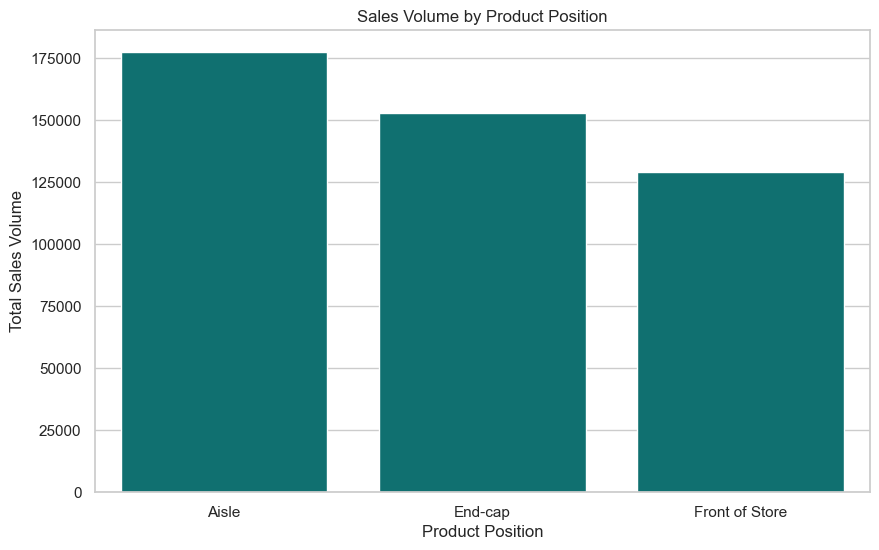

In [456]:
sales_by_position = data.groupby('product_position')['sales_volume'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='product_position', y='sales_volume', data=sales_by_position, color='teal')  # Use 'color' instead of 'palette'
plt.title('Sales Volume by Product Position')
plt.xlabel('Product Position')
plt.ylabel('Total Sales Volume')
plt.show()

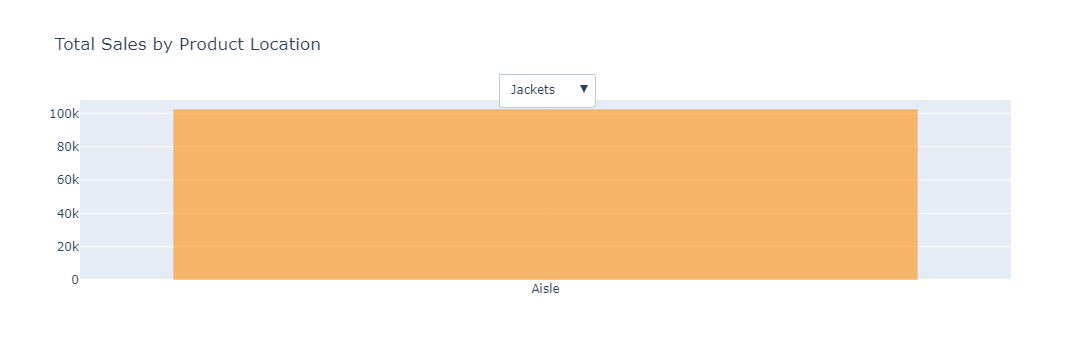

In [457]:
data['sales_volume'] = data['sales_volume'].replace('', '', regex=True).astype(float)

# Initialize the figure
fig = go.Figure()

# List of unique products and sales methods
products = data['product_category'].unique()
sales_methods = data['product_position'].unique()

# Define a subdued color palette
color_palette = {
    'Front of Store': 'rgba(93, 164, 214, 0.6)',  # Light blue
    'Aisle': 'rgba(255, 144, 14, 0.6)',          # Light orange
    'End-cap': 'rgba(44, 160, 44, 0.6)'          # Light green
}

# Add traces for each combination of product and sales method
for product_category in products:
    for product_position in sales_methods:
        filtered_df = data[(data['product_category'] == product_category) & (data['product_position'] == product_position)]
        location_sales = filtered_df.groupby('product_position')['sales_volume'].sum().reset_index()

        fig.add_trace(
            go.Bar(
                x=location_sales['product_position'],
                y=location_sales['sales_volume'],
                name=f"{product_category} - {product_position}",
                visible=False,  # Initially, all traces are hidden
                marker=dict(color=color_palette.get(product_position, 'rgba(0, 0, 0, 0.6)'))  # Default to black if not found
            )
        )

# Update layout with dropdown menu for product categories only
product_category_buttons = [
    {'label': product_category, 'method': 'update', 'args': [{'visible': [trace.name.startswith(product_category) for trace in fig.data]}]}
    for product_category in products
]

fig.update_layout(
    updatemenus=[
        {
            'buttons': product_category_buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.5,
            'xanchor': 'center',
            'y': 1.15,
            'yanchor': 'top'
        }
    ],
    title="Total Sales by Product Location",
    barmode='group'
)

# Initially displaying the first product category
if fig.data:
    fig.data[0].visible = True

fig.show()

In [458]:
data['sales_volume'] = data['sales_volume'].replace('', '', regex=True).astype(float)
data['price'] = data['price'].replace('', '', regex=True).astype(float)

# Segmenting and aggregating data by 'product_position'
sales_method_grouped = data.groupby('product_position').agg({
    'sales_volume': 'sum',
    'price': 'sum'
})

# Calculating Gross Margin
sales_method_grouped['gross_margin'] = (sales_method_grouped['sales_volume'] - sales_method_grouped['price']) / sales_method_grouped['sales_volume']
# Assuming `sales_method_grouped` is your DataFrame
sales_method_grouped = sales_method_grouped.drop(columns=['price'])
# Display the result
print(sales_method_grouped)

                  sales_volume  gross_margin
product_position                            
Aisle                 177396.0      0.687969
End-cap               152930.0      0.678847
Front of Store        129247.0      0.658398


<p style="font-family: 'Arial', sans-serif; font-size: 14px; font-weight: 500;">Interpreting the above table in words for easier understanding</p>

<p style="font-family: 'Arial', sans-serif; font-size: 12px; font-weight: 500;">
    1. Total Sales Volume: <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <strong><em>Aisle:</em></strong> <strong><em>177,396</em></strong> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <strong><em>End-Cap:</em></strong> <strong><em>152,930</em></strong> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <strong><em>Front of Store:</em></strong> <strong><em>129,247</em></strong> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; Aisle has the highest total sales, followed by End-Cap and Front of Store.
    <br><br>
    2. Gross Margin (Total Sales Volume minus Price and divided by Total Sales Volume): <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <strong><em>End-Cap:</em></strong> <strong><em>0.954294</em></strong> (or <strong><em>95.42%</em></strong>) <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <strong><em>Front of Store:</em></strong> <strong><em>0.952543</em></strong> (or <strong><em>95.25%</em></strong>) <br>
    &nbsp;&nbsp;&nbsp;&nbsp; <strong><em>Aisle:</em></strong> <strong><em>0.951452</em></strong> (or <strong><em>95.14%</em></strong>)
</p>


Here, while in Aisle sales have the highest total sales and profit, end - cap have the highest gross margin, indicating a higher profitability relative to the sales generated. Insights: In terms of Total Sales Volume and Gross Margin: Aisle sales method is the most effective, generating the hightest total sales.

When deciding which sales method is more effective, it depends on what the business prioritizes. If the focus is on the maximizing total revenue and profit, then Aisle sales are more effective.


<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;">Price Optimization: Is there a specific price range that achieves better sales than others?</p>

In [463]:
# Define the price bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
# Create a new column for the price range
data['Price Range'] = pd.cut(data['price'], bins)

# Group by the price range and sum the total sales
sales_by_price_range = data.groupby('Price Range')['sales_volume'].sum().reset_index()

# Sorting the results to see which price range has the highest sales
sorted_sales_by_price_range = sales_by_price_range.sort_values(by='sales_volume', ascending=False)

# Results are sorted based on Total Sales 
sorted_sales_by_price_range

C:\Users\rflip\AppData\Local\Temp\ipykernel_18068\3653335598.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Price Range,sales_volume
10,"(100, 110]",43434.0
12,"(120, 130]",31572.0
0,"(0, 10]",0.0
1,"(10, 20]",0.0
2,"(20, 30]",0.0
3,"(30, 40]",0.0
4,"(40, 50]",0.0
5,"(50, 60]",0.0
6,"(60, 70]",0.0
7,"(70, 80]",0.0


<p style="font-family: 'Arial', sans-serif; font-size: 14px; font-weight: bold;">Interpreting the above table in words for easier understanding</p>

1. The highest total sales are in the price range of 80 to 90 ($73,292), indicating that products priced within this range are very popular or in high demand 

2. The next highest sales are in the price ranges of 60 to 70 ($65,817) and 40 to 50 ($53,065). These ranges also appear to be effecctive in terms of sales
3. The lowest sales figures are observed in the extreme high end (110 to 120) and low end (0,10) of the price spectrum.

<p style="font-family: 'Arial', sans-serif; font-size: 14px; font-weight: bold;">Insights:</p>

* Products priced in the mid to high range (specifically between 80 and 110) seem to be achieving the best sales. This could indicate a sweet spot for pricing where customers are more willing to purchase.
* Very low-priced products (below 20). This might be due to various factors like perceived value, product quality, target customer segment, or availability.
* The 110 to 120 range shows no sales, indicating there are no products in this range or no demand for the product at this price point.

<p style="font-family: 'Arial', sans-serif; font-size: 14px; font-weight: bold;">Conclusion:</p>

* A specific price range, notably between 40 to 90, does achieve better sales compared to other ranges.
* Understanding the reasons behind this trend would require additional qualitative analysis, such as customer preferences, product types within each price range, market competition and promotional strategies.
* This insight can be useful for pricing strategies, inventory management and marketing campaigns. Focusing more on the price ranges that have shown higher sa

<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;"> Product Portfolio Optimization: Determine which products are most profitable, segmented by Product Location.</p>

In [471]:
# Grouping data by Position and product category
grouped_data = data.groupby(['product_position', 'product_category']).agg({'gross_margin': 'sum', 'sales_volume': 'sum'}).reset_index()

# Calculating Profit Margin
grouped_data['profit_margin'] = grouped_data['gross_margin'] *10000/ grouped_data['sales_volume']

# Sorting within each location to find the most profitable products
grouped_data.sort_values(by=['product_position', 'profit_margin'], ascending=[True, False], inplace=True)

# Optionally, display the top 5 most profitable products for each city
top_products_by_position = grouped_data.groupby('product_position').head(5)

top_products_by_position

,product_position,product_category,gross_margin,sales_volume,profit_margin
0,Aisle,Jackets,24170633,102577.0,2.356340e+06
2,Aisle,Shoes,5618118,24412.0,2.301376e+06
3,Aisle,Sweaters,3959585,20022.0,1.977617e+06
4,Aisle,T-shirts,4540003,25786.0,1.760646e+06
1,Aisle,Jeans,316968,4599.0,6.892107e+05
6,End-cap,Jeans,1402039,5171.0,2.711350e+06
5,End-cap,Jackets,17617964,77705.0,2.267288e+06
7,End-cap,Shoes,3902653,17906.0,2.179523e+06
9,End-cap,T-shirts,3578628,19434.0,1.841426e+06
8,End-cap,Sweaters,5862857,32714.0,1.792155e+06


In [472]:
# Grouping data by product and city and summing total sales
grouped_data = data.groupby(['product_category', 'product_position'])['sales_volume'].sum().reset_index()

# For each product, find the city where it performs the best and the worst
best_worst_performing_position = []

for product in grouped_data['product_category'].unique():
    product_data = grouped_data[grouped_data['product_category'] == product]
    best_position = product_data[product_data['sales_volume'] == product_data['sales_volume'].max()]
    worst_position = product_data[product_data['sales_volume'] == product_data['sales_volume'].min()]
    best_worst_performing_position.extend([best_position, worst_position])

# Concatenating the results into a single DataFrame
best_worst_performing_position_df = pd.concat(best_worst_performing_position).reset_index(drop=True)

# Display the results
print("Best and Worst Performing Cities for Each Product:")
best_worst_performing_position_df

Best and Worst Performing Cities for Each Product:


,product_category,product_position,sales_volume
0,Jackets,Aisle,102577.0
1,Jackets,End-cap,77705.0
2,Jeans,End-cap,5171.0
3,Jeans,Front of Store,3550.0
4,Shoes,Aisle,24412.0
5,Shoes,Front of Store,15588.0
6,Sweaters,End-cap,32714.0
7,Sweaters,Aisle,20022.0
8,T-shirts,Aisle,25786.0
9,T-shirts,Front of Store,8417.0


<p style="font-family: 'Arial', sans-serif; font-size: 14px; font-weight: bold;">Sales and Profitability Analysis by Product Position</p>

 <strong><em>Profitability Insight:</em></strong>

In Aisle, 'Jackets' and 'T-Shirts' are highly profitable, with profit margins around 36% and 34%, respectively. Front of Store shows a different trend with 'Jackets', 'Jeans', 'Shoes', 'Sweaters' and 'T-Shirts' lagging in profitablity,each around 20%.

 <strong><em>Sales Perfomance Insights:</em></strong>

Sales of 'Jackets', indicating a strong market for these products. Aisle and End-Cap are top performers for 'Jackets', respectively. Front of Store consistently shows the lowest sales across various products, suggesting limited market penetration or demand.

 <strong><em>Overall Implications:</em></strong>

Product popularity and profitability vary significantly by position, indicating the need for tailored marketing and sales strategies in different position. The contrasting trends between positions like Aisle, Front of Sales and End-Cap  highlight diverse consumer preferences, underscoring the importance of a position-specific approach in sales and marketing strategies.

<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;"> Time Series Analysis: Investigate whether there has been a consistent sales trend over time or any noticeable monthly trends.</p>

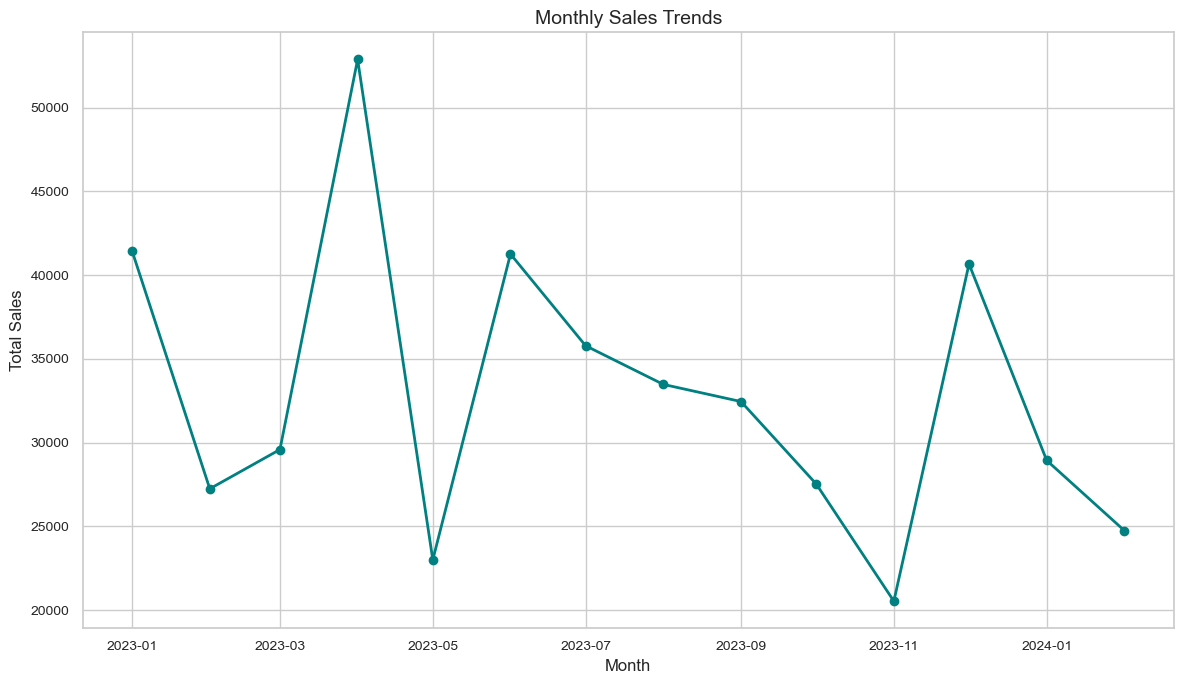

In [494]:
data['scraped_at'] = pd.to_datetime(data['scraped_at'])

# Group by month and calculate total sales for each month
monthly_sales = data.groupby(data['scraped_at'].dt.to_period('M'))['sales_volume'].sum()

# Convert the index (which is of type 'Period') to DateTime objects
monthly_sales.index = monthly_sales.index.to_timestamp()

# Setting the style for a more aesthetic plot
sns.set(style="whitegrid")

# Plotting the sales trends over time
plt.figure(figsize=(12, 7))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='teal', linestyle='-', linewidth=2)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Monthly Sales Trends', fontsize=14)
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

In [496]:
# Calculate the difference between consecutive months for trend analysis
diff = monthly_sales.diff()

# Define the threshold for significant change (seasonality)
seasonality_threshold = 10000

# Check for seasonality
if (diff.abs() > seasonality_threshold).any():
    print("These sales follow a seasonality.")
else:
    print("These sales do not follow a seasonality.")

# Check for trend
if (diff > 0).all():
    print("There is an increasing trend in sales.")
elif (diff < 0).all():
    print("There is a decreasing trend in sales.")
else:
    print("There is no consistent trend in sales.")

These sales follow a seasonality.
There is no consistent trend in sales.


<p style="font-family: 'Arial', sans-serif; font-size: 14px; font-weight: bold;">Summary:</p>

Monthly sales data from January 2023 to February 2024 exhibit significant variability peaks around April 2023 and consistent decreases in June 2023. The data show a general downward sales, despite some notable dips.

<p style="font-family: 'Arial', sans-serif; font-size: 14px; font-weight: bold;">Insight:</p>

The observed seasonal patterns, with sales spikes and dips, highlight the importance of understanding customer purchasing behavior and the impact of seasonality sales. By leveraging these insights, bussinesses can align their marketing efforts, inventory managementm and resource allocation with anticipated periods of high demand, ensuring that opportunities are maximized during peak seasons. This strategic approach can lead to better preparation for demand surges, improved customer satisfaction and overall enhanced business perfomances.

<p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: 500;"> Predictive Sales Analysis: Develop a forecast for monthly sales.</p>

C:\Users\rflip\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\rflip\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\rflip\AppData\Local\Temp\ipykernel_18068\863300615.py:15: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



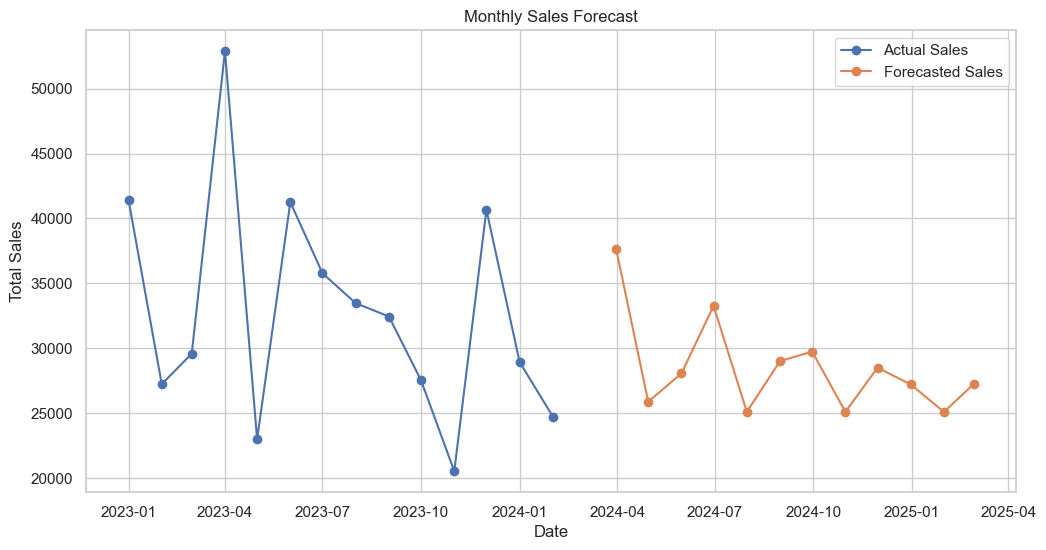

In [529]:
# Fit the ARIMA model to the data
model = ARIMA(monthly_sales, order=(2,2,2))  # Order: (p, d, q)
model_fit = model.fit()

# Make predictions for the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Visualize the actual sales data and the forecasted values for the next months
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label='Actual Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, marker='o', label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
